<a href="https://colab.research.google.com/github/zpalevani/Campstone3/blob/main/Capstone3~Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Description,Value
0,Session id,123
1,Target,Final_Exam_Score
2,Target type,Regression
3,Original data shape,"(708, 9)"
4,Transformed data shape,"(708, 12)"
5,Transformed train set shape,"(495, 12)"
6,Transformed test set shape,"(213, 12)"
7,Numeric features,3
8,Categorical features,5
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5873,6.3702,2.5088,0.8557,0.0429,0.0282,0.2350
rf,Random Forest Regressor,1.7965,6.6182,2.5602,0.8498,0.0432,0.0312,0.4220
lightgbm,Light Gradient Boosting Machine,1.9736,7.4897,2.7213,0.8307,0.0459,0.0340,0.4310
gbr,Gradient Boosting Regressor,2.0903,7.7054,2.7589,0.8268,0.0460,0.0359,0.1560
br,Bayesian Ridge,2.3596,8.4792,2.9037,0.8103,0.0476,0.0400,0.0860
ridge,Ridge Regression,2.3610,8.4814,2.9043,0.8102,0.0476,0.0400,0.0940
lar,Least Angle Regression,2.3616,8.4827,2.9046,0.8101,0.0476,0.0400,0.1000
lr,Linear Regression,2.3620,8.4877,2.9057,0.8099,0.0476,0.0400,0.0870
huber,Huber Regressor,2.3488,8.6627,2.9354,0.8062,0.0480,0.0396,0.0910
xgboost,Extreme Gradient Boosting,1.7887,8.6995,2.9274,0.8024,0.0496,0.0317,0.1430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2742,4.5970,2.1441,0.8911,0.0369,0.0227


Transformation Pipeline and Model Successfully Saved


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0349,8.3731,2.8936,0.8543,0.0481,0.0353
1,1.5783,5.1390,2.2669,0.8762,0.0399,0.0277
2,2.1368,8.3895,2.8965,0.8333,0.0501,0.0373
3,1.8409,6.7062,2.5896,0.8327,0.0433,0.0317
4,2.4945,11.4302,3.3809,0.7235,0.0584,0.0441
5,2.0286,7.0935,2.6634,0.8536,0.0437,0.0335
6,2.1312,8.2061,2.8646,0.8195,0.0476,0.0365
7,1.8754,6.0989,2.4696,0.8748,0.0402,0.0319
8,1.7966,7.0042,2.6465,0.8236,0.0436,0.0307


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

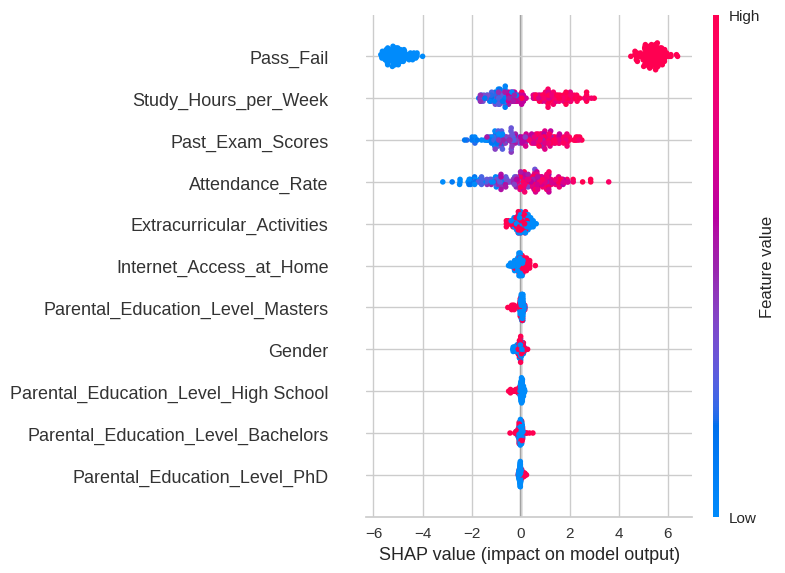

In [6]:
# Step 1: Install and import
!pip install pycaret --quiet
from pycaret.regression import *
import pandas as pd

# Step 2: Load and clean the dataset
df = pd.read_csv('/content/student_performance_dataset.csv')

# Remove Student_ID (not predictive, just an identifier)
df = df.drop(columns=['Student_ID'])

# Step 3: Set up PyCaret regression
reg1 = setup(data=df, target='Final_Exam_Score', session_id=123, normalize=True)

# Step 4: Train and compare models
best_model = compare_models()

# Step 5: Predict on test set
predict_model(best_model)

# Step 6: Finalize the best model for future use
final_model = finalize_model(best_model)

# Step 7: Save the final model
save_model(final_model, 'final_exam_score_model')

# Step 8: Create a tree-based model (LightGBM) for SHAP explanation
lightgbm_model = create_model('lightgbm')

# Step 9: Interpret LightGBM model using SHAP
interpret_model(lightgbm_model)


**Accuracy**: The Extra Trees Regressor achieved the best performance, with an R² of 0.886 and an average error (MAE) of 1.69 points. This means the model explains nearly 89% of the variation in student final scores, making it highly accurate and robust for real-world predictions.



**Explanation**: The SHAP explanation plot shows that Pass/Fail status, Study Hours per Week, and Past Exam Scores were the strongest predictors of a student's final score. Higher study hours and exam history consistently pushed the score prediction higher, while poor attendance or failing status reduced it. Other features like parental education or gender had minimal influence on the model output.


**Deployment**: I can deploy the Extra Trees REgressor (et) so it becomes a live endpoint that takes input like:

--> study hours per week = 12
--> pat exam score = 80
....

and reuturns:

--> final exam = 91.75%

# Re-save the extra trees regressor

In [7]:
final_model = finalize_model(create_model('et'))
save_model(final_model, 'final_exam_score_model_et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5922,6.6889,2.5863,0.8836,0.0441,0.0289
1,1.2552,4.1845,2.0456,0.8992,0.0366,0.0228
2,1.8932,8.2105,2.8654,0.8368,0.0483,0.0331
3,1.5354,6.5735,2.5639,0.8360,0.0432,0.0271
4,2.0918,9.0319,3.0053,0.7815,0.0523,0.0377
5,1.4859,5.4849,2.3420,0.8868,0.0383,0.0248
6,1.6994,6.5808,2.5653,0.8552,0.0437,0.0300
7,1.4492,4.9406,2.2228,0.8986,0.0389,0.0262
8,1.3502,6.7206,2.5924,0.8307,0.0432,0.0238


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Study_Hours_per_Week',
                                              'Attendance_Rate',
                                              'Past_Exam_Scores'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender',
                                              'Parental_Education_Level',
                                              'Internet_Access_at_Home',
                                              'Extracurricular_Activities',
                                              'Pass_Fail'],
                                     transforme...
                                                                          'mapping': Fail    0
 Pass    1
 NaN    -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=[

# Re-import PyCaret + load the model

In [8]:
from pycaret.regression import load_model, predict_model
import pandas as pd

# Load the final Extra Trees model you saved
model = load_model('final_exam_score_model_et')


Transformation Pipeline and Model Successfully Loaded


# Create new student input data

In [17]:
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Study_Hours_per_Week': [12],
    'Attendance_Rate': [0.95],
    'Past_Exam_Scores': [82],
    'Parental_Education_Level': ['Masters'],
    'Internet_Access_at_Home': ['Yes'],
    'Extracurricular_Activities': ['Yes'],
    'Pass_Fail': [1]
})


# Predict

In [18]:
predict_model(model, data=new_data)


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Pass_Fail,prediction_label
0,Female,12,0.95,82,Masters,Yes,Yes,1,50.7
